In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

from scipy import integrate
import numpy as np
from matplotlib import pyplot as plt

from dg_maxwell import lagrange
from dg_maxwell import isoparam
from dg_maxwell import wave_equation

plt.rcParams['figure.figsize']     = 12, 7.5
plt.rcParams['lines.linewidth']    = 1.5
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.weight']        = 'bold'
plt.rcParams['font.size']          = 20  
plt.rcParams['font.sans-serif']    = 'serif'
plt.rcParams['text.usetex']        = True
plt.rcParams['axes.linewidth']     = 1.5
plt.rcParams['axes.titlesize']     = 'medium'
plt.rcParams['axes.labelsize']     = 'medium'

plt.rcParams['xtick.major.size']   = 8
plt.rcParams['xtick.minor.size']   = 4
plt.rcParams['xtick.major.pad']    = 8
plt.rcParams['xtick.minor.pad']    = 8
plt.rcParams['xtick.color']        = 'k'
plt.rcParams['xtick.labelsize']    = 'medium'
plt.rcParams['xtick.direction']    = 'in'    

plt.rcParams['ytick.major.size']   = 8
plt.rcParams['ytick.minor.size']   = 4
plt.rcParams['ytick.major.pad']    = 8
plt.rcParams['ytick.minor.pad']    = 8
plt.rcParams['ytick.color']        = 'k'
plt.rcParams['ytick.labelsize']    = 'medium'
plt.rcParams['ytick.direction']    = 'in'
plt.rcParams['text.usetex']        = True
plt.rcParams['text.latex.unicode'] = True


In [2]:
def find_L1_norm(epsilon, dx_dxi, x):
    '''
    '''
    lagrange_basis, temp = lagrange.lagrange_polynomials(x)
    
    epsilon_interpol = 0.
    for i in np.arange(x.shape[0]):
        epsilon_interpol += lagrange_basis[i] * epsilon[i]
    
    return integrate.quad(epsilon_interpol * dx_dxi, -1, 1)[0]


In [3]:
def test_function(x):
    '''
    The test wave function.
    '''
    return np.sin(2 * np.pi * x)

In [4]:
M = 8 # Number of elements
x_nodes = np.linspace(0, 1, M + 1) # x nodes dividing the elements

In [5]:
x_nodes = np.array([[0.   , 0.125],
                    [0.125, 0.25],
                    [0.25 , 0.375],
                    [0.375, 0.5],
                    [0.5  , 0.625],
                    [0.625, 0.75],
                    [0.75 , 0.875],
                    [0.875, 1.]])

dx_dxi = (x_nodes[0][1] - x_nodes[0][0]) / 2

In [6]:
# The test points at which the analytical and interpolated wave functions
# will be compared.
xi_check = np.linspace(-.9, .9, 8)
L1_norm                = [] # Stores the L1 norm of the interpolated wave function

for N in np.arange(3, 31):
#     N = 8
    xi_LGL     = np.array(lagrange.LGL_points(int(N)))
    x_LGL      = [] # x_nodes calculated at the LGL points for an element
    x_check    = [] # x coordinates at which the analytical and interpolated functions are compared

    # Test function calculated at the LGL points, to be used for finding the lagrange interpolation.
    test_func_LGL = []

    lagrange_basis, temp = lagrange.lagrange_polynomials(xi_LGL)
    test_func_intepol_poly = 0. # Stores the Lagrange interpolation function for an element.

    # Stores the value of the inerpolated function at the xi_check points for each elements.
    test_function_interpol = []

    L1_norm.append(0.)
    L1 = 0.
    # This loop loops over all the elements and finds the interpolation function using
    # Lagrange basis polynomials and test_func_LGL. It then uses the interpolation function
    # to calculate the value of the polynomial at the xi_check points for each element.
    for node in x_nodes:
        test_func_intepol_poly = 0.
        x_LGL.append(isoparam.isoparam_1D(node, xi_LGL))
        x_check.append(isoparam.isoparam_1D(node, xi_check))
        test_func_LGL.append(test_function(x_LGL[-1]))

        for i in np.arange(len(test_func_LGL[-1])):
            test_func_intepol_poly += lagrange_basis[i] * test_func_LGL[-1][i]
        test_function_interpol.append(test_func_intepol_poly(xi_check))

        L1_norm[-1] += find_L1_norm(np.abs(test_function_interpol[-1] - test_function(x_check[-1])),
                                    dx_dxi, xi_check)

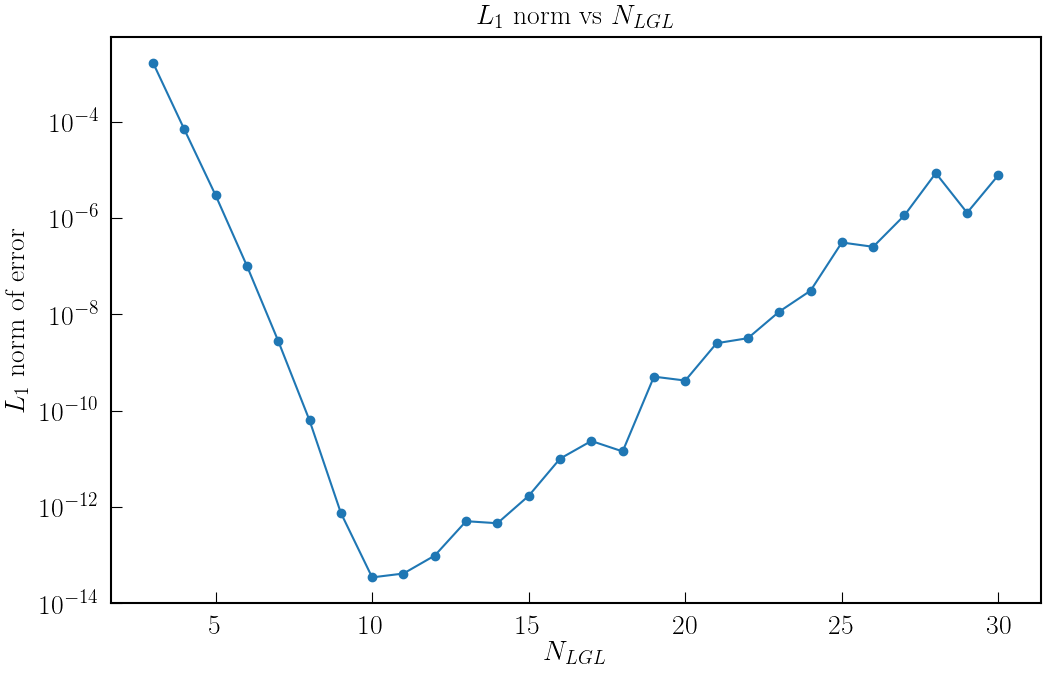

In [8]:
plt.title(r'$L_1$ norm vs $N_{LGL}$')
plt.xlabel(r'$N_{LGL}$')
plt.ylabel(r'$L_1$ norm of error')
plt.semilogy(np.arange(3, 31), L1_norm, 'o-')
# plt.savefig('lagrange_interpolation_test.png')
plt.show()